1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [11]:
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


Resample by the day and take the average temperature. Visualize the average temperature over time.

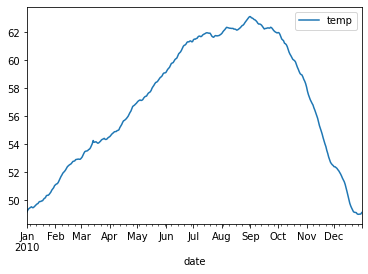

In [25]:
avg_temp = df.resample('D').mean()
avg_temp.plot()
plt.show()

Write the code necessary to visualize the minimum temperature over time.

In [23]:
min_temp = df.resample('D').min()

<AxesSubplot:xlabel='date'>

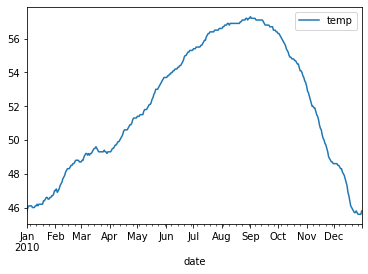

In [24]:
min_temp.plot()

Write the code necessary to visualize the maximum temperature over time.

In [47]:
df = df.resample('D').max()

<AxesSubplot:xlabel='date'>

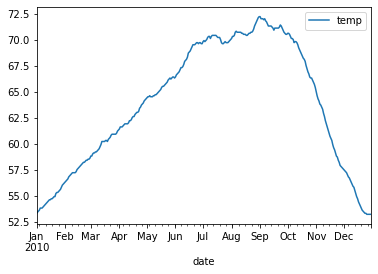

In [22]:
max_temp.plot()

Which month is the coldest, on average? - January

Which month has the highest average temperature? - September

In [28]:
df['month'] = df.index.month
df.groupby('month').mean().sort_values('temp')

,temp
month,
1,49.984140
12,50.498253
2,52.243899
3,53.956528
11,55.185139
4,55.633056
5,57.970968
10,60.253091
6,60.444722


Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


August

In [36]:
df_daily = df.resample('D').temp.agg(['min','max'])

In [39]:
df_daily['temp_diff']= df_daily.max - df_daily.min

TypeError: unsupported operand type(s) for -: 'method' and 'method'

In [48]:
temp_diff = max_temp - min_temp

In [55]:
temp_diff.resample('M').max().sort_values('temp')

,temp
date,
2010-12-31,8.9
2010-01-31,9.3
2010-02-28,9.9
2010-11-30,11.8
2010-03-31,12.0
2010-04-30,13.0
2010-05-31,13.1
2010-10-31,14.4
2010-06-30,14.8


Bonus

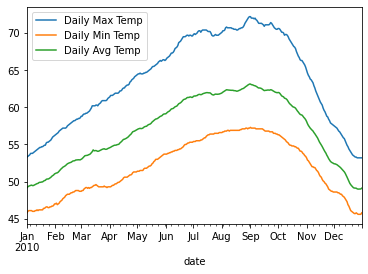

In [86]:
max_temp.temp.plot(label = 'Daily Max Temp')
min_temp.temp.plot(label = 'Daily Min Temp')
avg_temp.temp.plot(label = 'Daily Avg Temp')
plt.legend()
plt.show()

In [78]:
from vega_datasets import data
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [79]:
pd.to_datetime(df.date)

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [80]:
df = df.set_index('date')
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


Which year and month combination has the highest amount of precipitation?

Decmber 2015

In [83]:
df.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

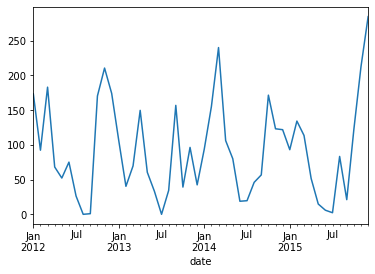

In [84]:
df.resample('M').sum().precipitation.plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

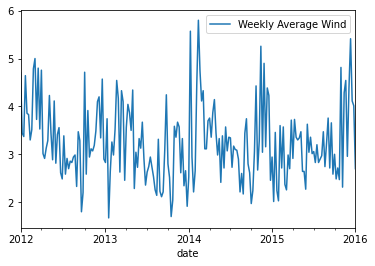

In [92]:
# df.resample('W').max().wind.plot(label = 'Weekly Max Wind')
# df.resample('W').min().wind.plot(label = 'Weekly Min Wind')
df.resample('W').mean().wind.plot(label = 'Weekly Average Wind')
plt.legend()
plt.show()

Which year-month combination is the windiest?

December 2015

In [94]:
df.resample('M').sum().wind.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

2014

In [97]:
df['sunny'] = df.weather=='sun'

In [101]:
df.resample('Y').sum().sunny.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

In which month does it rain the most?

November

In [110]:
df['month'] = df.index.month

In [111]:
df.groupby('month').sum().precipitation.sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

Which month has the most number of days with a non-zero amount of precipitation?

December 2012

In [114]:
rainy_days = df[df.precipitation!=0]

In [119]:
rainy_days.resample('M').count().precipitation.sort_values().tail()

date
2015-11-30    20
2012-01-31    22
2012-03-31    22
2015-12-31    25
2012-12-31    27
Name: precipitation, dtype: int64